In [1]:
suppressMessages(library(plot3D))         # for 3D plotting
suppressMessages(library(ggplot2)) 		    # for plotting
suppressMessages(library(reshape))        # for accessing columns of dataframes
suppressMessages(library(gridExtra))      # for plotting multiple plots in one images

In [32]:
library(RColorBrewer)

In [66]:
# set working directory
#path <-	"~/dev/qt/bacterial_community_simulator/"
#setwd(path)  

# create directory to store images
picPath <- "./"

NFluxMode = 1

# *** function declarations *****************************************************************************
plot <- function(cult_type) {
  # open input datafile
  filename <- paste("../experiments/test/v2.09.2_sim_test_sfm/", "experiments/", cult_type, 
                    "_mono-culture/", "EU_avg", "/species_fluxes.tsv", sep = "") 
  DT <- read.delim(filename, header = T)
  
  # store list of species
  assign("speciesList", as.list(levels(DT$species_name)), envir = .GlobalEnv)
  
  # rearrange dataframe
  DT <- melt(DT, id = c("time", "species_name", "fluxmode"))
  
  for(species in speciesList) {
    DT2 <- DT[DT$species_name == species, ]
    
    # normalise fluxmode IDs for imaging
    #DT2$fluxmode <- DT2$fluxmode - DT2$fluxmode[1]
    
    # get data for x,y,z coords
    x <- as.numeric(DT2$variable)
    y <- DT2$time
    z <- DT2$value

    # create plot
    if (NFluxMode > 1){
        plot <- scatter3D(x, y, z,
                       # axis labels
                       main = c("Active exchange fluxes of ", species, paste("in", "EU_avg", sep = " ")),
                       xlab = "Exchange Flux ID", ylab = "Time (h)", zlab = "Flux rate (mmol/gDW/h)", 
                       ticktype = "detailed",
                        
                       # legend
                       clab = c("Legend:","FluxMode ID"),
                       colvar = DT2$fluxmode, 
                       colkey = list(length = 0.5),

                       # background, dot size, and 3D plot rotation/view angle
                       bty = "b2", cex = 0.1,
                       theta = 33, phi = 0)        
    } else {
        plot <- scatter3D(x, y, z,
                       # axis labels
                       main = c("Active exchange fluxes of ", species, paste("in", "EU_avg", sep = " ")),
                       xlab = "Exchange Flux ID", ylab = "Time (h)", zlab = "Flux rate (mmol/gDW/h)", 
                       ticktype = "detailed",

                       col="#596aa9ff",

                       # background, dot size, and 3D plot rotation/view angle
                       bty = "b2", cex = 0.1,
                       theta = 33, phi = 0)         
    }

    # limit the axis
    plotdev(zlim = c(1.0e-99, max(DT2$value)))
    
    # create a single plot from 3 plots with different view angles
    png(paste(picPath, "Fluxes_", cult_type, ".png", sep = ""), width = 30.0, height = 15.0, res = 300, units = "cm")
    layout(matrix( c(1,2,3), 1, 3, byrow = T), respect = T)

    pf <- plotdev(zlim = c(1.0e-99, max(DT2$value)), theta = 0)
    p  <- plotdev(zlim = c(1.0e-99, max(DT2$value)))
    ps <- plotdev(zlim = c(1.0e-99, max(DT2$value)), theta = 90) 

    dev.off()
  }
}

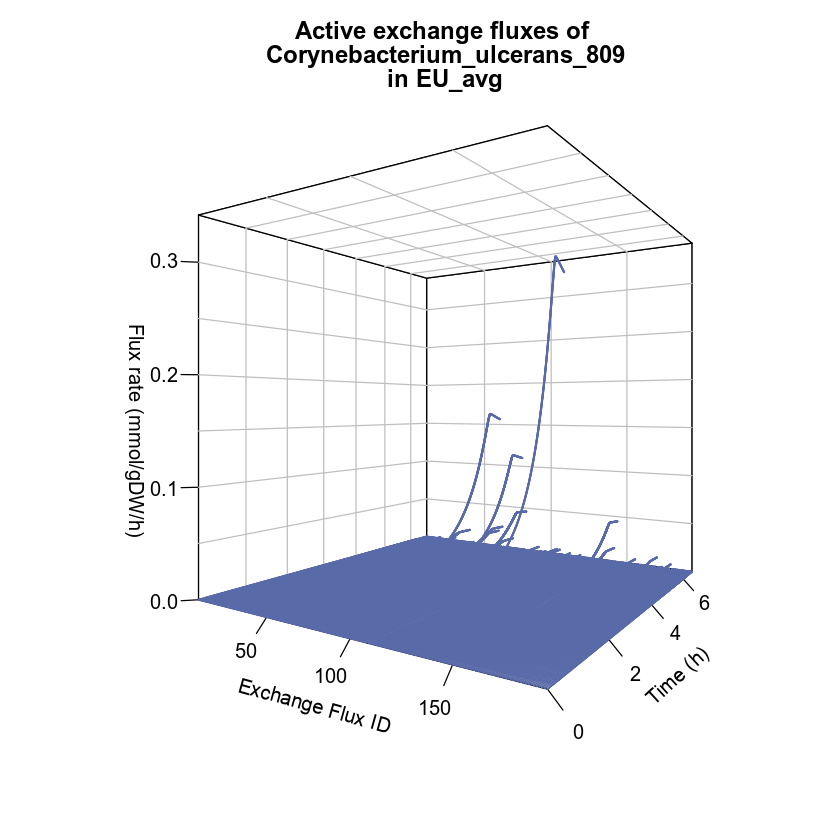

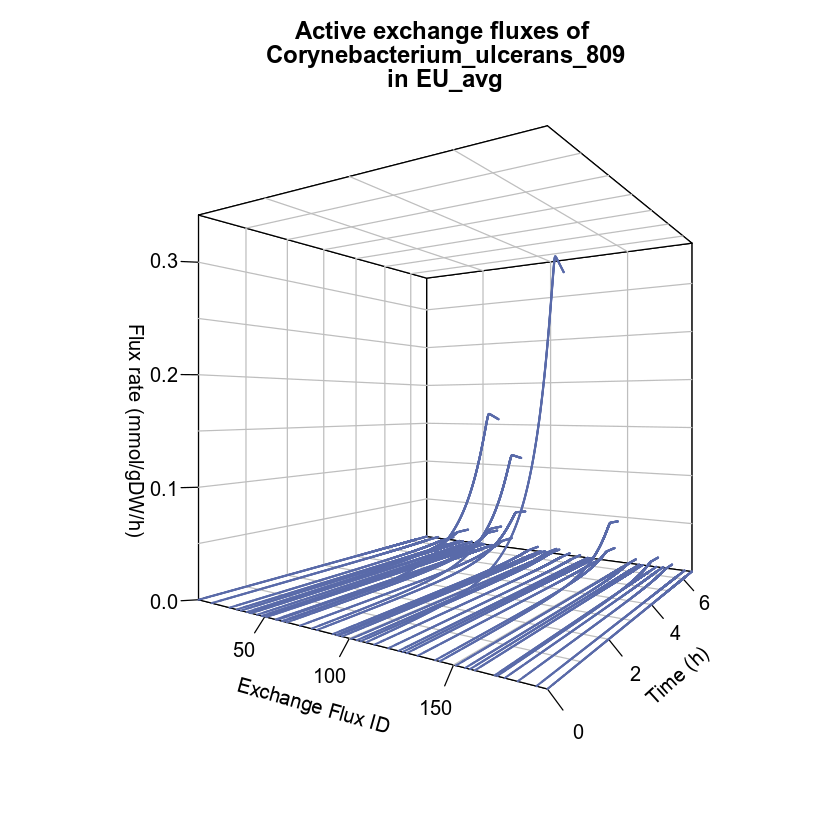

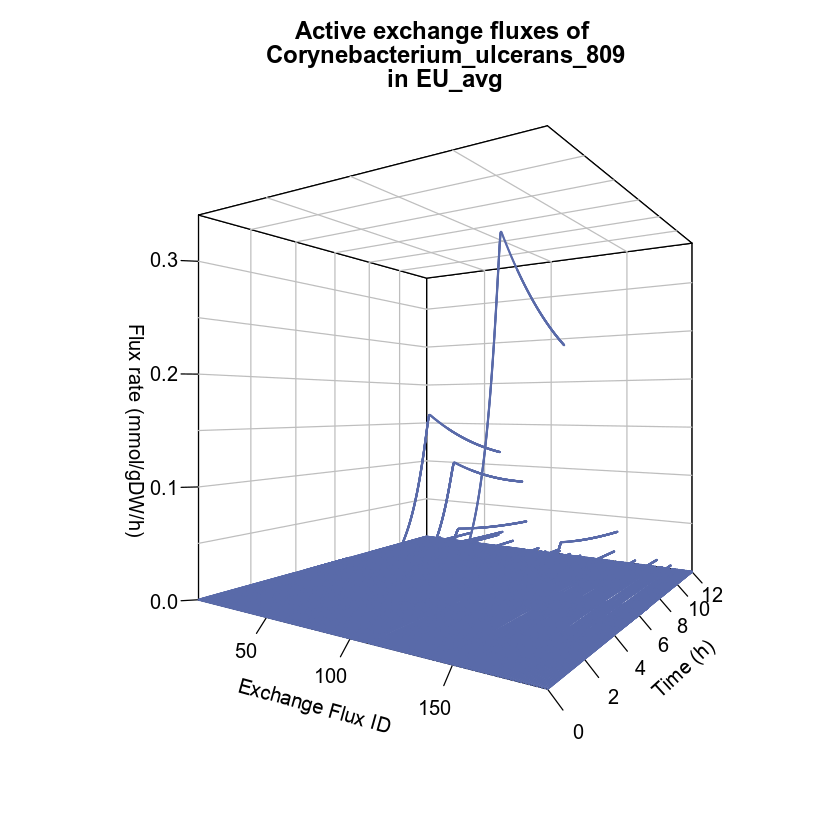

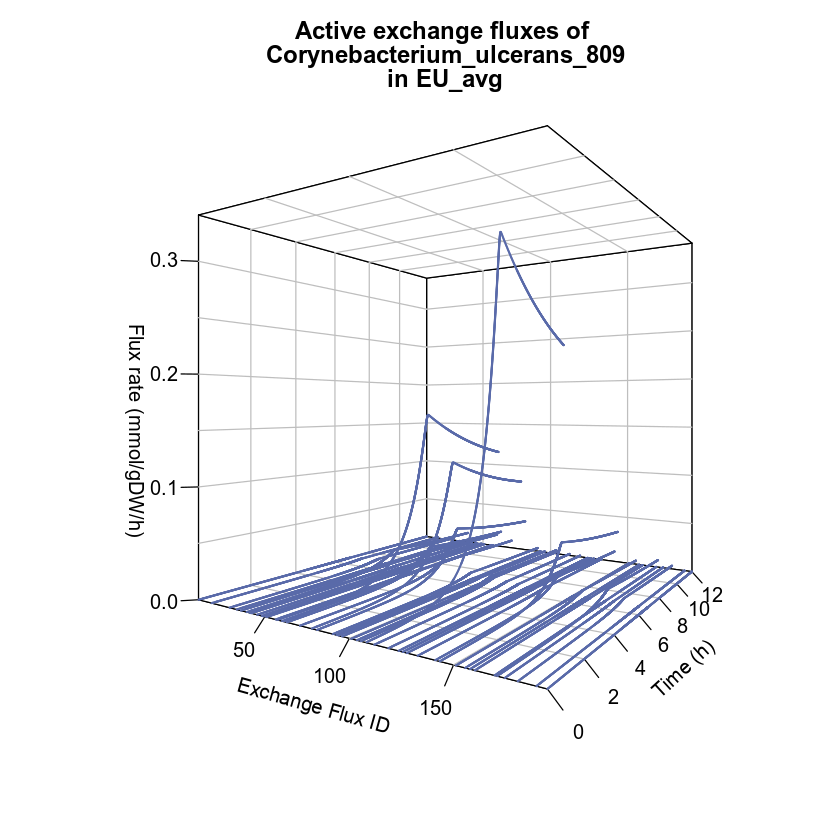

In [67]:
# *** function activation *******************************************************************************
plot("batch")
plot("continuous")

# check whether the unwanted file exists and remove it
if(file.exists("Rplots.pdf")) {
  suppressMessages(file.remove("Rplots.pdf"))
}